In [3]:
#import libraries

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
import math
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load dataset
df = pd.read_csv("/content/pizza_v2.csv") 

In [6]:
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [7]:
# Getting the information about the data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [8]:
#pre processing

# Removing Rp
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '').str.replace(',', '').astype('float64') 
# Removing Inch
df['diameter'] = df['diameter'].str.replace('inch', '').str.replace(',', '').astype('float64') 

#here we convert objects type numeric values into numbers.

df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [9]:
#pre processing
df.isnull().sum()

#here we can see no missing values.

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [10]:
df.describe()

,price_rupiah,diameter
count,129.000000,129.000000
mean,87151.162791,12.976744
std,44706.097732,3.272674
min,23500.000000,8.000000
25%,51000.000000,12.000000
50%,78000.000000,12.000000
75%,105000.000000,14.000000
max,248000.000000,22.000000


In [11]:
df.dtypes

company             object
price_rupiah       float64
diameter           float64
topping             object
variant             object
size                object
extra_sauce         object
extra_cheese        object
extra_mushrooms     object
dtype: object

In [12]:
# check unique values

df.nunique(axis=0)

company             5
price_rupiah       43
diameter           11
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
dtype: int64

array([[<Axes: title={'center': 'price_rupiah'}>]], dtype=object)

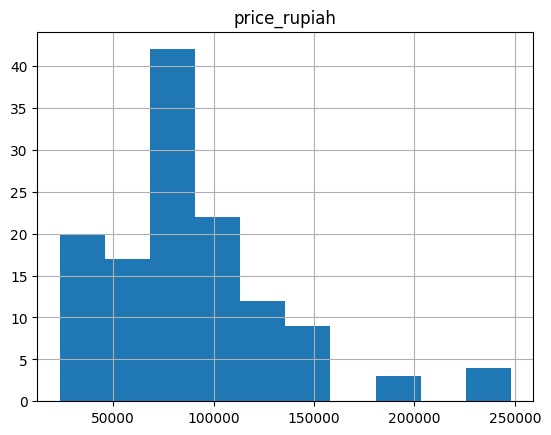

In [13]:
df.hist(column='price_rupiah')

array([[<Axes: title={'center': 'diameter'}>]], dtype=object)

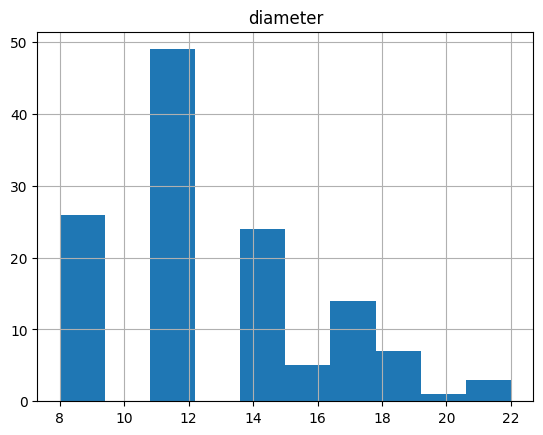

In [14]:
df.hist(column='diameter')

<Axes: >

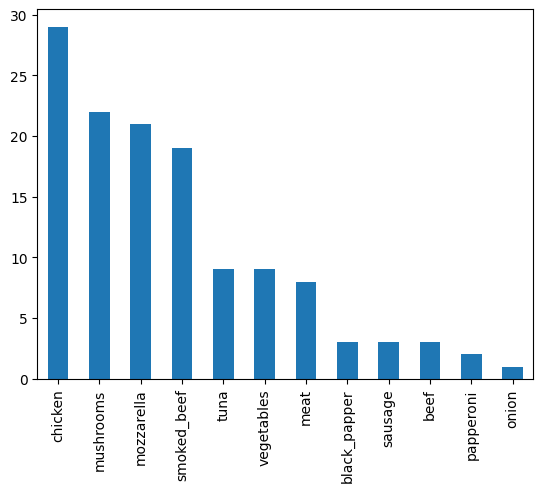

In [15]:
df['topping'].value_counts().plot(kind='bar')

<Axes: >

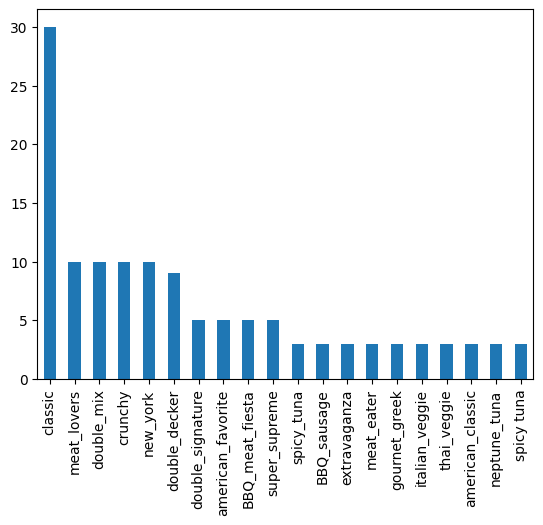

In [16]:
df['variant'].value_counts().plot(kind='bar')

<Axes: >

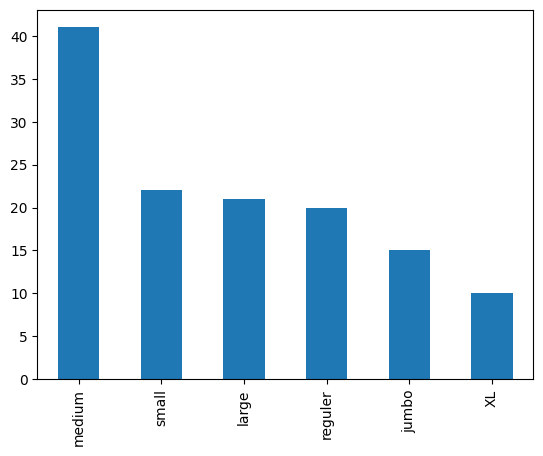

In [17]:
df['size'].value_counts().plot(kind='bar')

<Axes: ylabel='extra_sauce'>

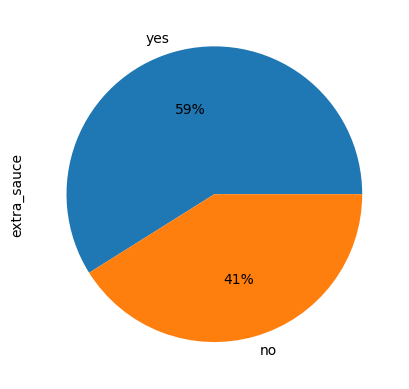

In [18]:
df['extra_sauce'].value_counts().plot(kind='pie',autopct='%1.0f%%')

<Axes: ylabel='extra_cheese'>

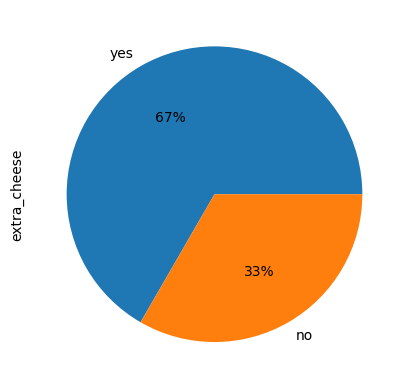

In [19]:
df['extra_cheese'].value_counts().plot(kind='pie',autopct='%1.0f%%')

<Axes: ylabel='extra_mushrooms'>

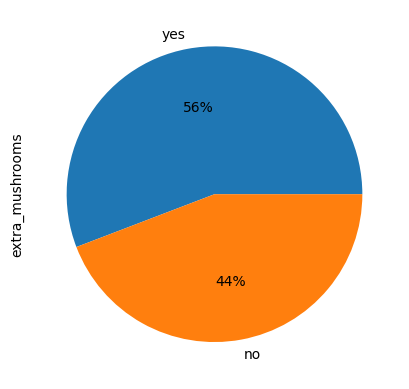

In [20]:
df['extra_mushrooms'].value_counts().plot(kind='pie',autopct='%1.0f%%')

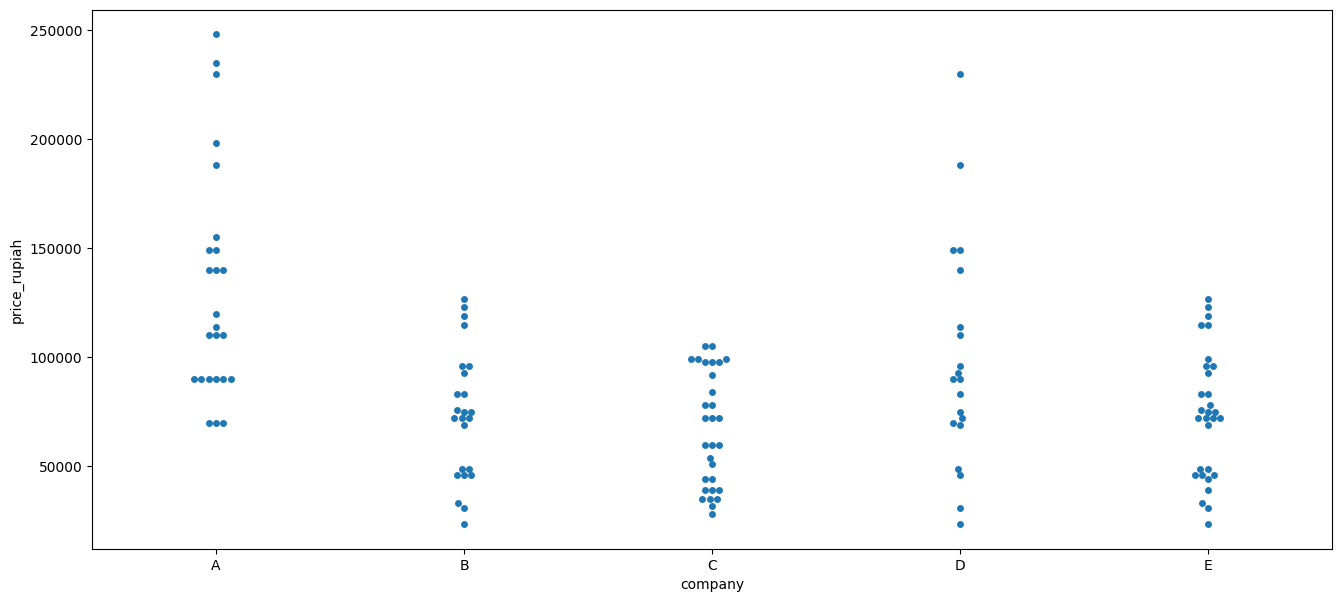

In [21]:
plt.figure(figsize=(16, 7))
sns.swarmplot(x='company', y='price_rupiah', data=df)
plt.show()

In [22]:
#replace categorical data values using dummy variables.

encoder = LabelEncoder()
cato_col = [col for col in df.columns if df[col].dtype == 'object']

for cols in cato_col:
    df[cols] = encoder.fit_transform(df[cols])

In [23]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000.0,22.0,2,8,1,1,1,0
1,0,198000.0,20.0,7,8,1,1,1,0
2,0,120000.0,16.0,5,8,4,1,1,1
3,0,155000.0,14.0,9,8,4,1,0,1
4,0,248000.0,18.0,4,8,1,1,0,1


In [24]:
#Split data into train and test using libries

y = pd.DataFrame(df["price_rupiah"])
X = df.drop("price_rupiah",axis = 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [26]:
# Define the model and fit
model = LinearRegression() 
model.fit(X_train, y_train) 

LinearRegression()

In [27]:
# Get predictions
predictions = model.predict(X_test) 

In [28]:
#Evaluating trainning data using these 3 metrics

# Calculate MAE
mae = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error:" , mae)

#Calculating R2
r2 =  metrics.r2_score(y_test, predictions)
print("R2 score :", r2)

mse = math.sqrt(metrics.mean_squared_error(y_test, predictions)) 
print(f'Root MSE :',mse)

Mean Absolute Error: 17253.909449342063
R2 score : 0.48125291331111353
Root MSE : 21173.28470590217


In [40]:
# Define the hyperparameters and their values for tuning
parameters = {'fit_intercept': [True, False]}

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_test, y_test)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
best_mae = mean_absolute_error(y_test, y_pred)
best_r2 = metrics.r2_score(y_test, y_pred)
best_mse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Linear Regression Model with Hyperparameter Tuning Evaluation:")
print("Best Hyperparameters:", best_params)
print("Mean Absolute Error:", best_mae)
print("R2 Score:", best_r2)
print("Root Mean Squared Error:", best_mse)

Linear Regression Model with Hyperparameter Tuning Evaluation:
Best Hyperparameters: {'fit_intercept': False}
Mean Absolute Error: 10494.731035178576
R2 Score: 0.7972146621329158
Root Mean Squared Error: 13238.19205155546


In [ ]:
# Define the model
model2 = XGBRegressor() 

# Fit the model
model2.fit(X_train,y_train) 

# Get predictions
predictions2 = model2.predict(X_test) 

#Evaluating the new model testing data using these 3 metrics

# Calculate MAE
mae = mean_absolute_error(y_test,predictions2)
print("Mean Absolute Error:" , mae)

#Calculating R2
r2 =  metrics.r2_score(y_test, predictions2)
print("R2 score :", r2)

mse = math.sqrt(metrics.mean_squared_error(y_test, predictions2)) 
print(f'Root MSE :',mse)